## Naive Bayes (NB)

Naive bayes algorithm is a probabilistic model used for classification tasks that is based on the Bayes theorem:

<img src = "https://images.squarespace-cdn.com/content/v1/591e58f72994cab66b93f891/1495241596804-61O4OLPITD2YJVNERSY3/bayes-rule-e1350930203949.png">

<b>Assumptions of Naive Bayes</b>: Features are independent with each other (No multicollinearity)

<b>Requirement of feature scaling: No</b>

<b>Robust to outliers: No</b>

<b>Advantages of Naive Bayes</b>:
1. Fast training and prediction time
2. Provide direct probabilistic prediction
3. Easy to interpret
4. Less hyperparameter tuning required

<b>Disadvantages of Naive Bayes</b>:
1. Model performs poorly if assumption of feature independence is not satisfied
2. Categories that are not seen during model training will result in prediction error, such that zero probabilities are assigned to unknown classes.

<b>Time complexity of model training: O(n * d * c)</b>

<b>Time complexity of model prediction: O(d*c)</b>

<b>Space complexity of model prediction: O(c)</b>

n - Number of samples

d - Number of features

c - Number of target classes

<b>Methods to handle imbalanced dataset</b>:
1. Resampling techniques (Oversampling/SMOTETomek)

## Types of Naive Bayes model

In scikit-learn, there are 5 different types of Naive Bayes model:

1. <b>Bernoulli NB</b> : Used for discrete features with binary or boolean types
2. <b>Categorical NB</b> : Used for discrete features that are categorically distributed
3. <b>Complement NB</b> : Adaptation to multinomial naive bayes model, especially for <b>imbalanced datasets</b>
- Complement naive bayes calculates the probability of item belonging to all classes, instead of a certain class
4. <b>Gaussian NB</b>: Used for continuous features with assumption of normally distributed
5. <b>Multinomial NB</b>: Used for discrete features with integer counts

## Naive Bayes Classifier Example

Refer to the following documentation for more details about the use of Naive Bayes Classification on sklearn library:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

The following example below illustrates the process of creating a Naive Bayes classifier model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import missingno
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import feature_engine.outliers as feo
import scipy.stats as st
import feature_engine.transformation as fet
import feature_engine.wrappers as few
from sklearn.preprocessing import PowerTransformer

In [2]:
dataset = load_wine()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=['class'])],axis=1)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [5]:
data.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
class                             3
dtype: int64

In [6]:
data['class'].value_counts()/len(data['class'])

1    0.398876
0    0.331461
2    0.269663
Name: class, dtype: float64

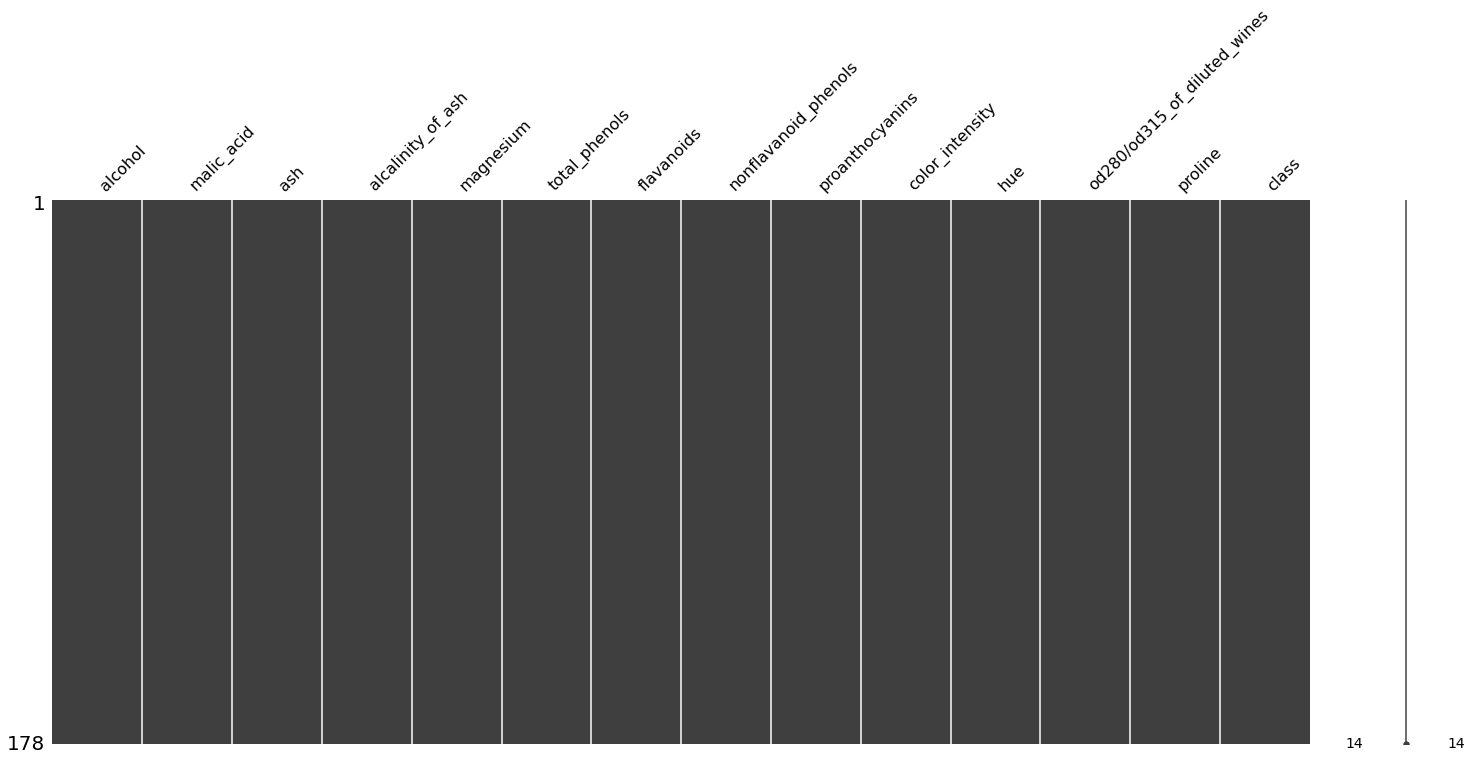

In [7]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [8]:
X = data.drop(['class'],axis=1)
y = data['class']

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

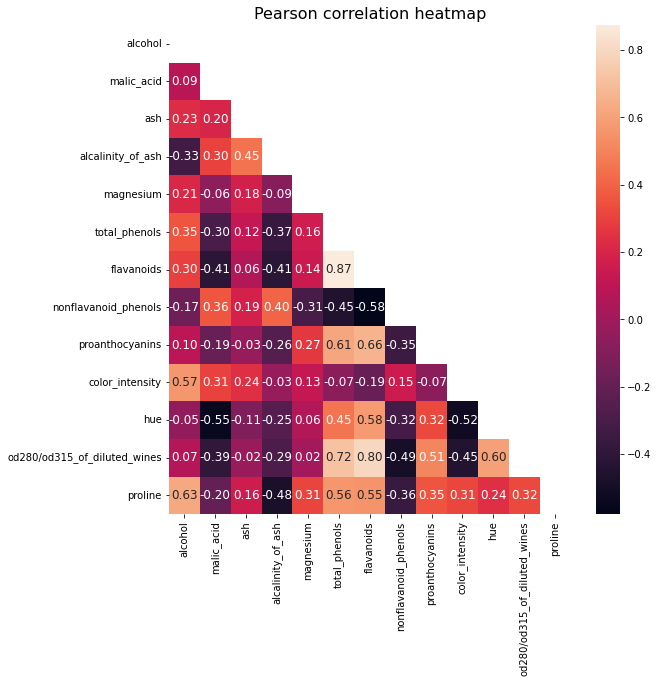

In [10]:
# Pearson correlation heatmap
correlation = X_train.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':12})
plt.title('Pearson correlation heatmap',size=16)
plt.show()

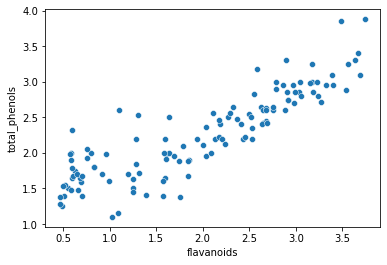

In [11]:
# Scatterplot for flavanoids vs total_phenols
sns.scatterplot(x = X_train['flavanoids'],y = X_train['total_phenols'])
plt.show()

In [12]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
vif = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif_results = pd.DataFrame({'vif': vif}, index=X_train.columns)
vif_results

,vif
alcohol,2.647915
malic_acid,1.638624
ash,2.016091
alcalinity_of_ash,2.286553
magnesium,1.465911
total_phenols,4.895275
flavanoids,8.919049
nonflavanoid_phenols,2.026589
proanthocyanins,2.262229
color_intensity,3.111700


In [13]:
column_remove = []

# Removing variable with highest variance inflation factor on every iteration until all variables have VIF value less than 5
while vif_results.sort_values(by='vif',ascending=False).iloc[0].values[0] > 5:
    column = vif_results.sort_values(by='vif',ascending=False).iloc[0].name
    X_train_scaled = X_train_scaled.drop(column,axis=1)
    column_remove.append(column)
    
    vif = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
    vif_results = pd.DataFrame({'vif': vif}, index=X_train_scaled.columns)
vif_results

,vif
alcohol,2.609330
malic_acid,1.620914
ash,1.922940
alcalinity_of_ash,2.254596
magnesium,1.392752
total_phenols,3.466476
nonflavanoid_phenols,1.763475
proanthocyanins,1.910809
color_intensity,3.102236
hue,2.351292


In [14]:
X_train = X_train.drop(column_remove,axis=1)
X_test = X_test.drop(column_remove,axis=1)

In [15]:
# Multinomial Naive Bayes
nbclf = MultinomialNB()
nbclf.fit(X_train, y_train)
y_pred = nbclf.predict(X_test)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, nbclf.predict_proba(X_test), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

           0   0.888889  0.842105  0.864865        19
           1   0.894737  0.772727  0.829268        22
           2   0.647059  0.846154  0.733333        13

    accuracy                       0.814815        54
   macro avg   0.810228  0.820329  0.809155        54
weighted avg   0.833053  0.814815  0.818698        54

ROC AUC Score: 0.9624297410441506


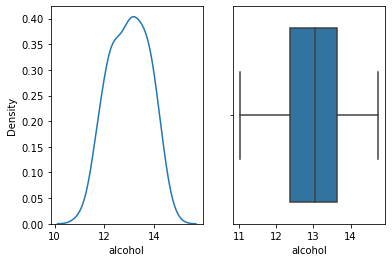

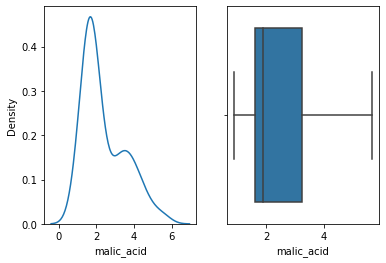

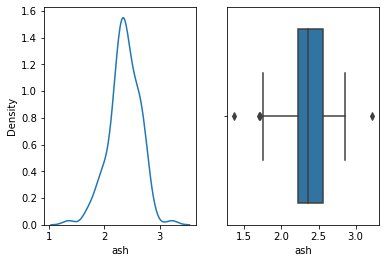

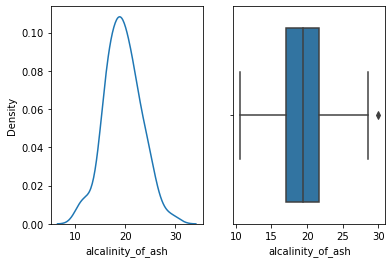

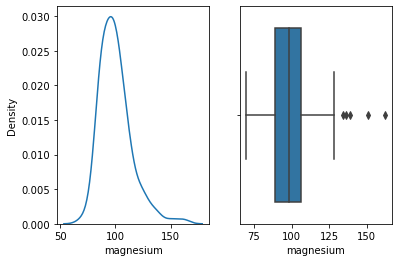

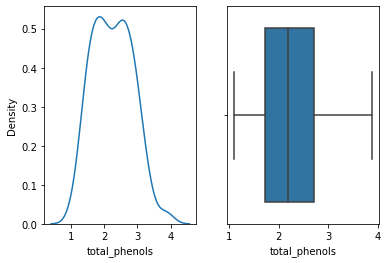

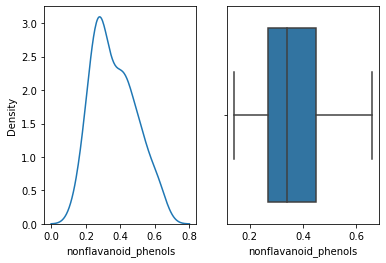

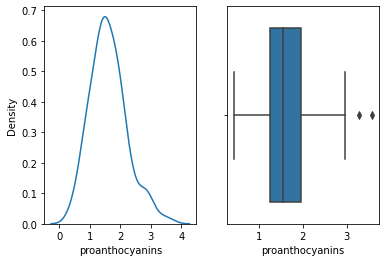

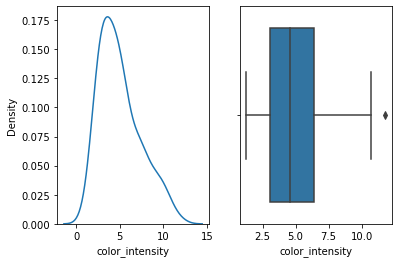

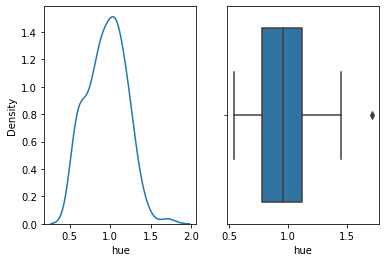

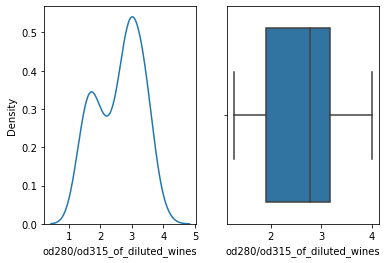

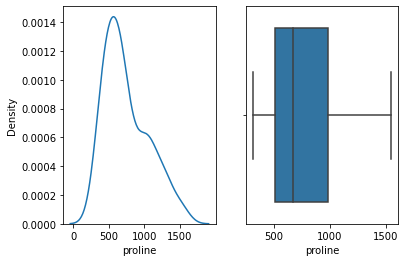

In [16]:
for column in X_train.columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X_train, x=column, ax=ax[0])
    sns.boxplot(data=X_train, x=column, ax=ax[1])
    plt.show()

In [17]:
# Checking for gaussian distribution of numerical variables using anderson test
gaussian_columns = []
non_gaussian_columns = []
for column in X_train.columns:
    result = st.anderson(X_train[column])
    if result[0] > result[1][2]:
        non_gaussian_columns.append(column)
    else:
        gaussian_columns.append(column)
print(f"List of gaussian variables: {gaussian_columns}")
print(f"List of non-gaussian variables: {non_gaussian_columns}")

List of gaussian variables: ['alcohol', 'ash', 'alcalinity_of_ash', 'hue']
List of non-gaussian variables: ['malic_acid', 'magnesium', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']


In [18]:
# Checking proportion of outliers for gaussian columns
outlier_prop = []
for column in gaussian_columns:
    lower_bound = np.mean(X_train[column]) - 3 * np.std(X_train[column])
    upper_bound = np.mean(X_train[column]) + 3 * np.std(X_train[column])
    outlier_prop.append(np.round(len(X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)])/len(X_train),4))
results = pd.concat([pd.Series(X_train[gaussian_columns].columns),pd.Series(outlier_prop)],axis=1)\
            .rename({0:'Variable',1:'Prop_Outliers'},axis=1)
results.sort_values(by='Prop_Outliers',ascending=False).head(10)

,Variable,Prop_Outliers
1,ash,0.0161
3,hue,0.0081
0,alcohol,0.0000
2,alcalinity_of_ash,0.0000


In [19]:
# Checking proportion of outliers for non-gaussian columns
outlier_prop = []
for column in non_gaussian_columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_prop.append(np.round(len(X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)])/len(X_train),4))
results = pd.concat([pd.Series(X_train[non_gaussian_columns].columns),pd.Series(outlier_prop)],axis=1)\
            .rename({0:'Variable',1:'Prop_Outliers'},axis=1)
results.sort_values(by='Prop_Outliers',ascending=False).head(10)

,Variable,Prop_Outliers
1,magnesium,0.0403
4,proanthocyanins,0.0161
5,color_intensity,0.0081
0,malic_acid,0.0000
2,total_phenols,0.0000
3,nonflavanoid_phenols,0.0000
6,od280/od315_of_diluted_wines,0.0000
7,proline,0.0000


Since proportion of outliers are very small for both gaussian and non-gaussian columns, we can replace the outliers by its mean for gaussian variables and median for non-gaussian variables since the size of the dataset is small.

In [20]:
# Gaussian Naive Bayes
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)
y_pred = nbclf.predict(X_test)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, nbclf.predict_proba(X_test), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        19
           1   1.000000  0.954545  0.976744        22
           2   0.928571  1.000000  0.962963        13

    accuracy                       0.981481        54
   macro avg   0.976190  0.984848  0.979902        54
weighted avg   0.982804  0.981481  0.981609        54

ROC AUC Score: 0.9995265151515151


In [21]:
# Replacing outliers of gaussian variables by mean of variable
X_train_no_outliers = X_train.copy()
X_test_no_outliers = X_test.copy()
for column in gaussian_columns:
    lower_bound = np.mean(X_train_no_outliers[column]) - 3 * np.std(X_train_no_outliers[column])
    upper_bound = np.mean(X_train_no_outliers[column]) + 3 * np.std(X_train_no_outliers[column])
    X_train_no_outliers.loc[(X_train_no_outliers[column] < lower_bound) | (X_train_no_outliers[column] > upper_bound),column] = X_train_no_outliers[column].mean()
    X_test_no_outliers.loc[(X_test_no_outliers[column] < lower_bound) | (X_test_no_outliers[column] > upper_bound),column] = X_train_no_outliers[column].mean()

In [22]:
# Replacing outliers of non-gaussian variables by median of variable
for column in non_gaussian_columns:
    Q1 = X_train_no_outliers[column].quantile(0.25)
    Q3 = X_train_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train_no_outliers.loc[(X_train_no_outliers[column] < lower_bound) | (X_train_no_outliers[column] > upper_bound),column] = X_train_no_outliers[column].median()
    X_test_no_outliers.loc[(X_test_no_outliers[column] < lower_bound) | (X_test_no_outliers[column] > upper_bound),column] = X_train_no_outliers[column].median()

In [23]:
# Gaussian Naive Bayes
nbclf = GaussianNB()
nbclf.fit(X_train_no_outliers, y_train)
y_pred = nbclf.predict(X_test_no_outliers)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, nbclf.predict_proba(X_test_no_outliers), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        19
           1   0.954545  0.954545  0.954545        22
           2   0.923077  0.923077  0.923077        13

    accuracy                       0.962963        54
   macro avg   0.959207  0.959207  0.959207        54
weighted avg   0.962963  0.962963  0.962963        54

ROC AUC Score: 0.9984276394337369


Note that removing outliers does not improve model accuracy and ROC AUC Score.

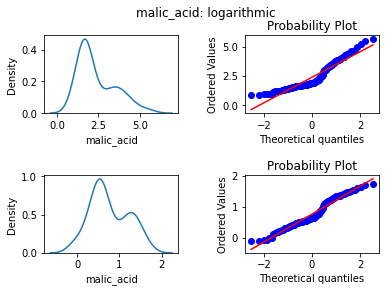

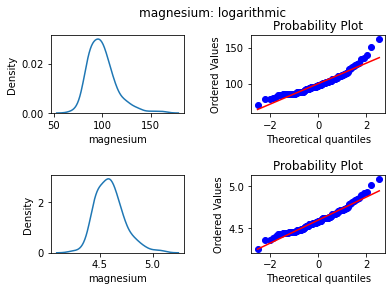

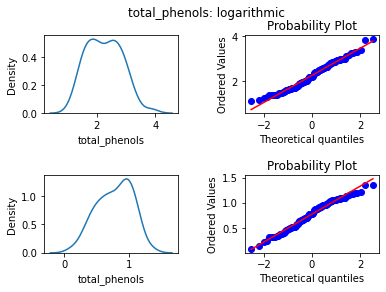

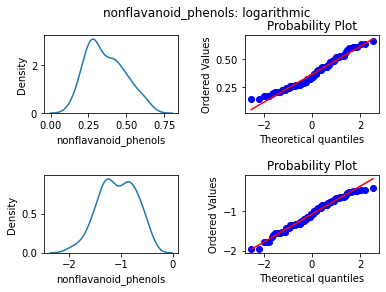

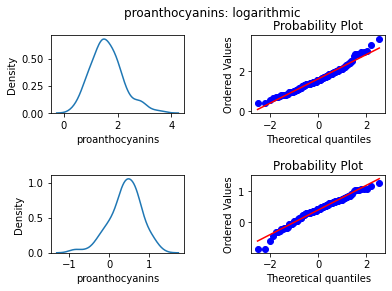

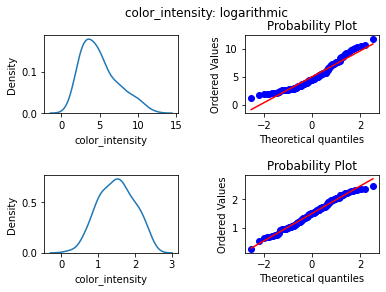

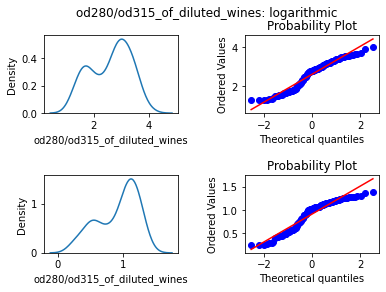

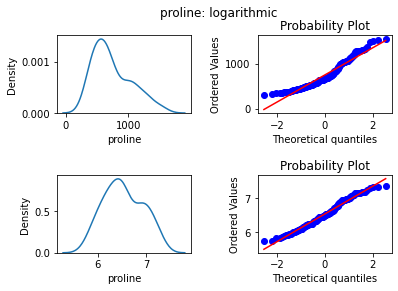

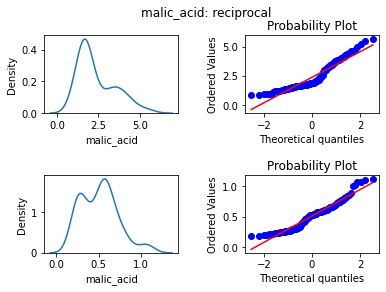

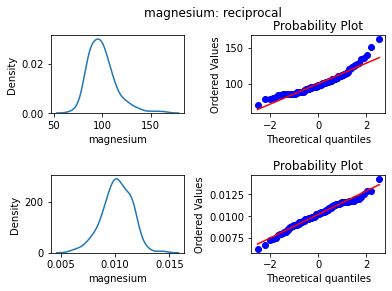

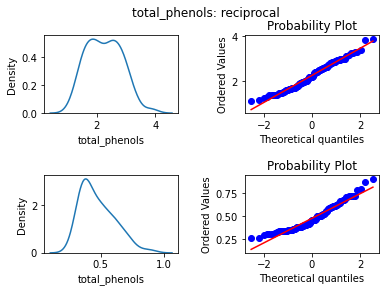

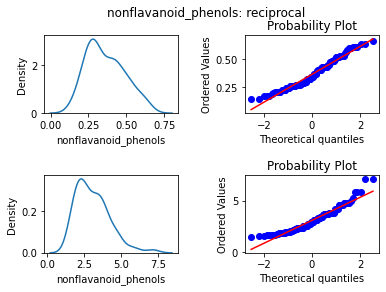

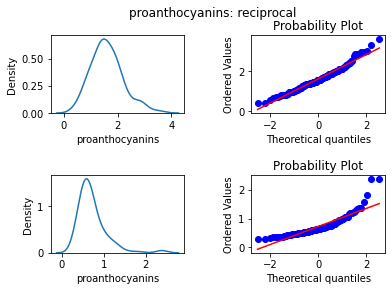

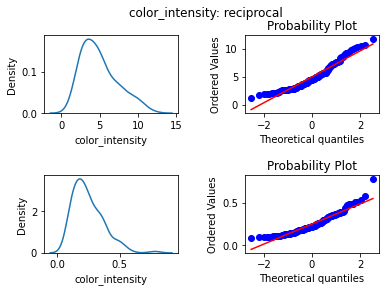

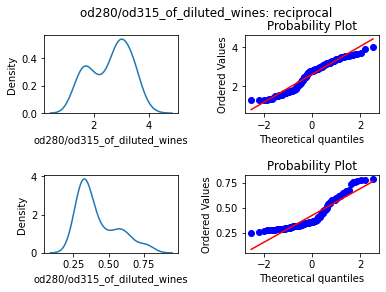

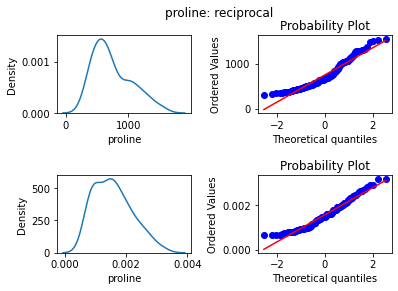

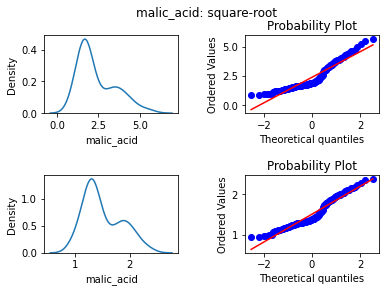

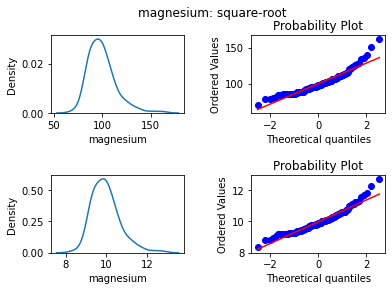

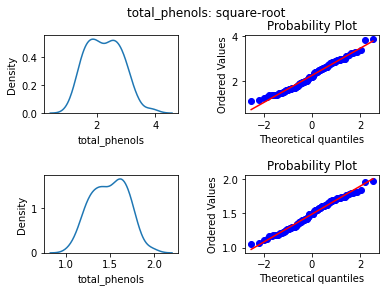

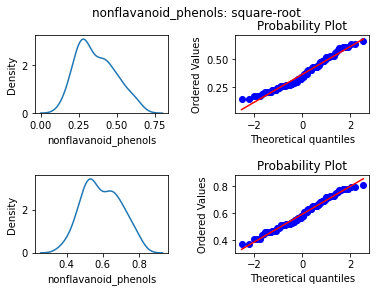

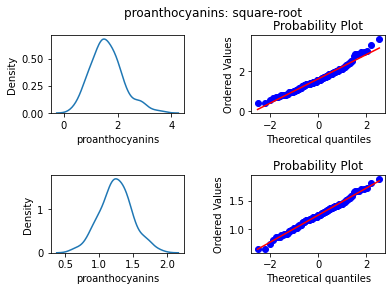

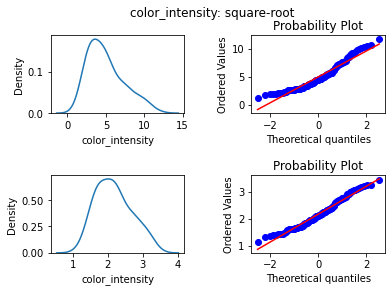

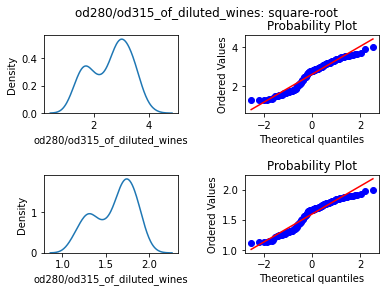

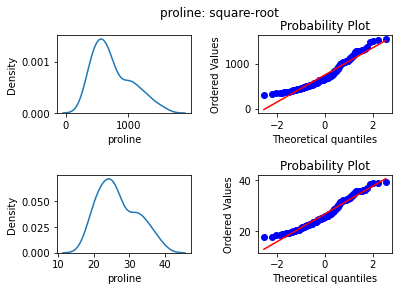

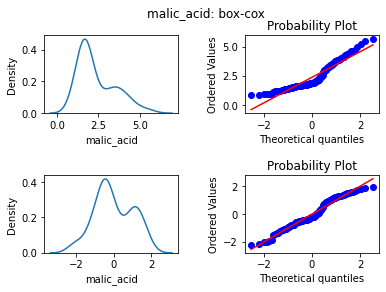

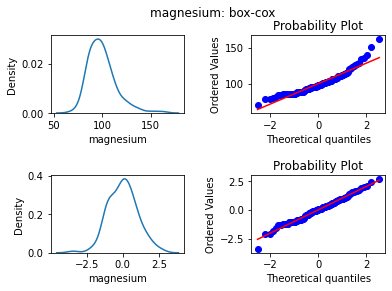

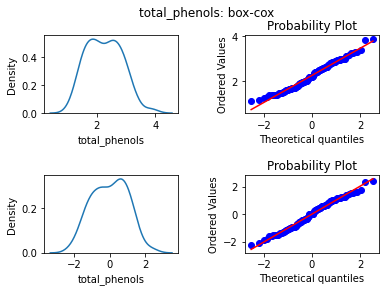

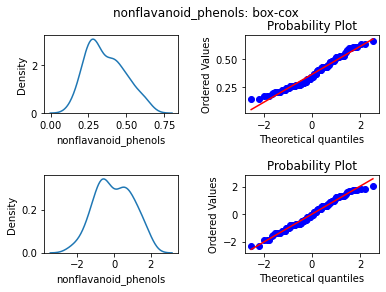

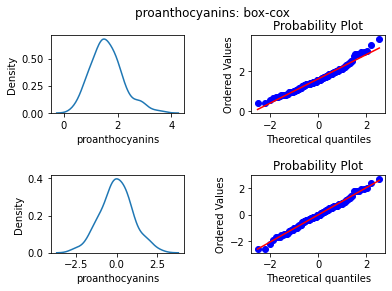

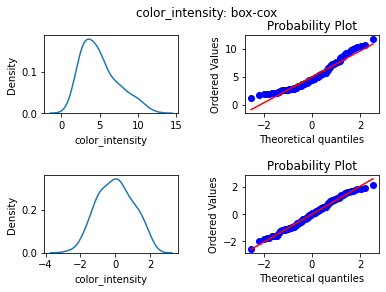

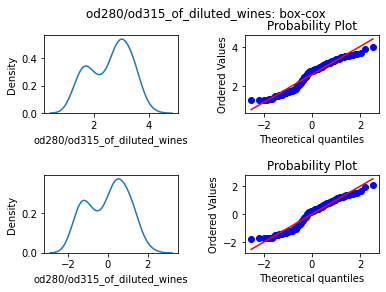

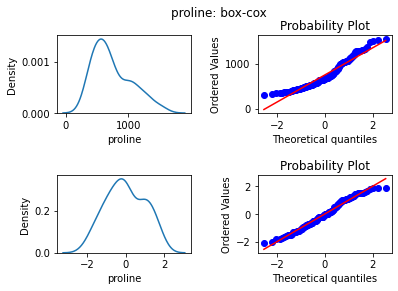

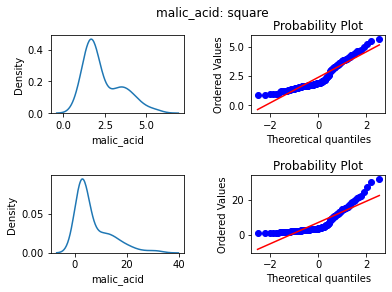

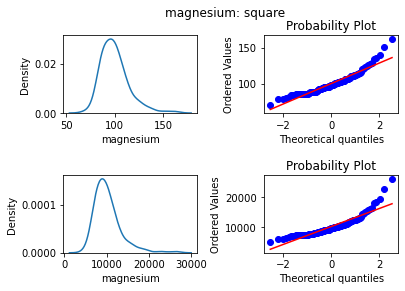

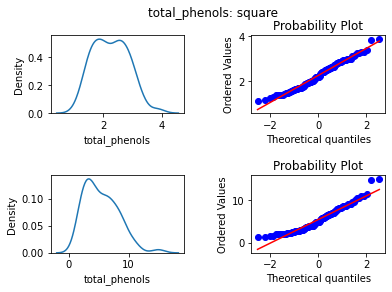

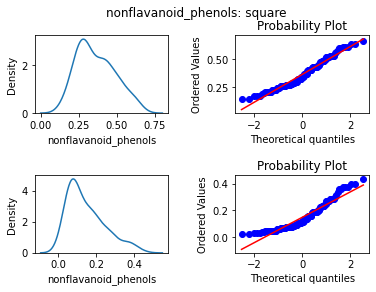

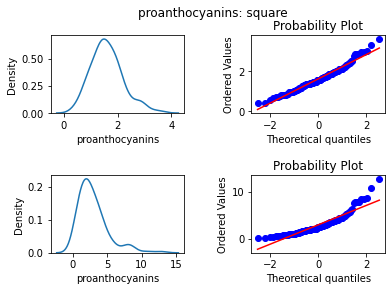

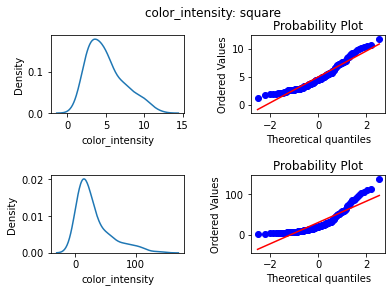

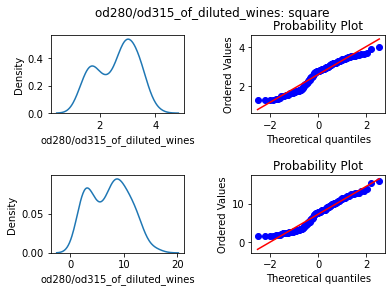

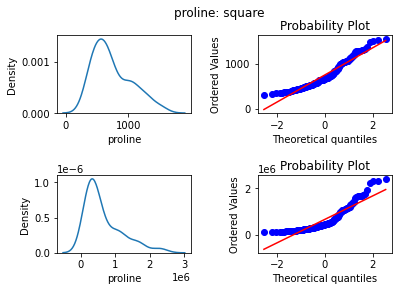

In [24]:
transformer_list = [fet.LogTransformer(), fet.ReciprocalTransformer(), fet.PowerTransformer(exp=0.5),
                   few.SklearnTransformerWrapper(PowerTransformer(method='box-cox')), fet.PowerTransformer(exp=2)]
transformer_names = ['logarithmic','reciprocal','square-root','box-cox','square']

result_names = []
result_test_stats = []
result_skewness = []
result_kurtosis = []
result_columns = []
result_critical_value=[]

for transformer, name in zip(transformer_list, transformer_names):
    X_transformed = transformer.fit_transform(X_train)
    for column in X_transformed[non_gaussian_columns]:
        f, ax = plt.subplots(2,2)
        sns.kdeplot(data=X_train, x=column,ax=ax[0][0])
        st.probplot(X_train[column], plot=ax[0][1])
        sns.kdeplot(data=X_transformed, x=column,ax=ax[1][0])
        st.probplot(X_transformed[column], plot=ax[1][1])
        plt.subplots_adjust(wspace=0.5, hspace=0.8)
        plt.suptitle(f"{column}: {name}")
        plt.show()
        result_columns.append(column)
        result_names.append(name)
        result_test_stats.append(st.anderson(X_transformed[column])[0])
        result_critical_value.append(st.anderson(X_transformed[column])[1][2])
        result_skewness.append(np.round(X_transformed[column].skew(),6))
        result_kurtosis.append(np.round(X_transformed[column].kurt(),6))

In [25]:
results = pd.DataFrame([pd.Series(result_columns),pd.Series(result_names),pd.Series(result_test_stats),
                        pd.Series(result_critical_value),pd.Series(result_skewness),pd.Series(result_kurtosis)]).T

results.columns = ['Columns','Transformation_Type', 'Test-stats','Critical value','Skewness','Kurtosis']
results.sort_values(['Columns','Test-stats'])

,Columns,Transformation_Type,Test-stats,Critical value,Skewness,Kurtosis
5,color_intensity,logarithmic,0.382618,0.764,-0.063535,-0.630874
29,color_intensity,box-cox,0.397484,0.764,-0.006445,-0.659985
21,color_intensity,square-root,0.963372,0.764,0.389666,-0.602243
13,color_intensity,reciprocal,2.380484,0.764,1.21322,2.162345
37,color_intensity,square,7.46771,0.764,1.54831,1.970735
25,magnesium,box-cox,0.359148,0.764,-0.022666,0.53526
9,magnesium,reciprocal,0.520446,0.764,-0.270327,0.5232
1,magnesium,logarithmic,1.192387,0.764,0.775692,1.213293
17,magnesium,square-root,1.741479,0.764,1.046869,1.924951
33,magnesium,square,4.388935,0.764,1.975809,5.924149


From the results above, the following transformations result in gaussian distribution for the following variables:

- color_intensity: Logarithmic transformation
- magnesium: Box-cox transformation
- nonflavanoid_phenols: Logarithmic transformation
- proanthocyanins: Square-root transformation
- proline: Box-cox transformation
- total_phenols: Square-root transformation

In [26]:
transformer = fet.LogTransformer(variables = ['color_intensity','nonflavanoid_phenols'])
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

transformer = few.SklearnTransformerWrapper(PowerTransformer(method='box-cox'), variables=['magnesium','proline'])
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

transformer =fet.PowerTransformer(exp=0.5, variables=['proanthocyanins','total_phenols'])
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [27]:
# Gaussian Naive Bayes with gaussian transformation variables
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)
y_pred = nbclf.predict(X_test)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, nbclf.predict_proba(X_test), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000        19
           1   1.000000  1.000000  1.000000        22
           2   1.000000  1.000000  1.000000        13

    accuracy                       1.000000        54
   macro avg   1.000000  1.000000  1.000000        54
weighted avg   1.000000  1.000000  1.000000        54

ROC AUC Score: 1.0


Note that gaussian transformation improves model performance and ROC AUC score. However, this perfect model performance requires caution when deploying it into live production environment, since the size of the dataset is quite small.